In [11]:
import os
import numpy as np
import pandas as pd

import pymatgen as pg
import os


In [12]:

def local_min(df):

    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()

    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] > 0)]

    if len(local_min_indices) == 0:
        print('No local max found')
        new_df = pd.DataFrame(columns=['cell_length', 'Edis'])
        # put values 0 , 0 in the dataframe
        new_df.loc[0] = [0, 0]
        print(min(new_df['Edis']))
        return new_df
    local_mins = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)

    return local_mins

def local_max(df):
    df['dy'] = df['Edis'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()
    
    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] < 0)]

    if len(local_min_indices) == 0:
        print('No local max found')
        new_df = pd.DataFrame(columns=['cell_length', 'Edis'])
        # put values 0 , 0 in the dataframe
        new_df.loc[0] = [0, 0]
        print(min(new_df['Edis']))
        return new_df

    local_max = df.loc[local_min_indices, ['cell_length', 'Edis']].reset_index(drop=True)
    return local_max

In [ ]:
def finding_diff(df):
    abs_max = df['Edis'].iloc[-1]
    max_val = max(local_max(df)['Edis'])
    min_val = min(local_min(df)['Edis'])
    min_val_idx = local_min(df)[local_min(df)['Edis'] == min_val].index[0]
    min_length = local_min(df).loc[min_val_idx, 'cell_length']
    
    max_val_idx = local_max(df)[local_max(df)['Edis'] == max_val].index[0]
    
    # equation of line between two points (x1, y1) and (x2, y2)
    x1 = local_max(df).loc[max_val_idx, 'cell_length'] 
    x2 = df['cell_length'].iloc[-1]

    y1 = max_val
    y2 = abs_max
    # print(min_length)
    
    # Finding the maximum slope
    max_slope = float('-inf')
    best_x2 = x2
    best_y2 = y2
    
    # Get the dataframe points after x1
    points_after_x1 = df[df['cell_length'] > x1][['cell_length', 'Edis']]
    
    # Iterate through all points after x1
    for idx, row in points_after_x1.iterrows():
        temp_x2 = row['cell_length']
        temp_y2 = row['Edis']
        temp_slope = (y1 - temp_y2) / (x1 - temp_x2)
        
        if temp_slope > max_slope:
            max_slope = temp_slope
            best_x2 = temp_x2
            best_y2 = temp_y2
    
    x2 = best_x2
    y2 = best_y2
    slope = max_slope
    intercept = y2 - slope * x2

    if y2 < y1:
        slope = 0
        intercept = y1

    #value of y when x = min_length
    y_at_min_length = slope * min_length + intercept

    diff = abs(min_val - y_at_min_length)
    return diff


In [14]:
# def finding_diff(df):
#     abs_max = df['Edis'].iloc[-1]
#     max_val = max(local_max(df)['Edis'])
#     min_val = min(local_min(df)['Edis'])

    
#     if np.isnan(abs_max):
#         abs_max = 0
        
#     # print('a',abs_max)
#     # print('b',max_val)
#     # print('c',min_val)

#     if max_val == 0 or min_val == 0:
#         return 0

#     diff = (abs_max + max_val)/2 - min_val

#     return diff

In [15]:
li_d3s = os.listdir('files')

In [16]:
delta_e = []
cnt = 0
for items in li_d3s:
    print(f"Processing {items}")
    cnt+=1
    #get the path of each folder
    path = 'files'
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store":
        continue
    file = os.path.join(path, f'{items}')
    df = pd.read_csv(file)
    print(f"Reading {file}")

    diff_energy = finding_diff(df)
    delta_e.append({f'{items.strip('.csv')}': diff_energy})

Processing LiH_long.csv
Reading files/LiH_long.csv
Processing LiH_dense.csv
Reading files/LiH_dense.csv
Processing LiH_less.csv
Reading files/LiH_less.csv
Processing CuI_less.csv
Reading files/CuI_less.csv
Processing CuI.csv
Reading files/CuI.csv
Processing LiH.csv
Reading files/LiH.csv
Processing CuI_long.csv
Reading files/CuI_long.csv


In [17]:
delta_e

[{'LiH_long': 0.08240766349053424},
 {'LiH_dense': 0.08195308265225176},
 {'LiH_le': 0.080448753361877},
 {'CuI_le': 0.0003107484564877144},
 {'CuI': 0.0003107484564877144},
 {'LiH': 0.08203249434794824},
 {'CuI_long': 0.0003107484564877144}]

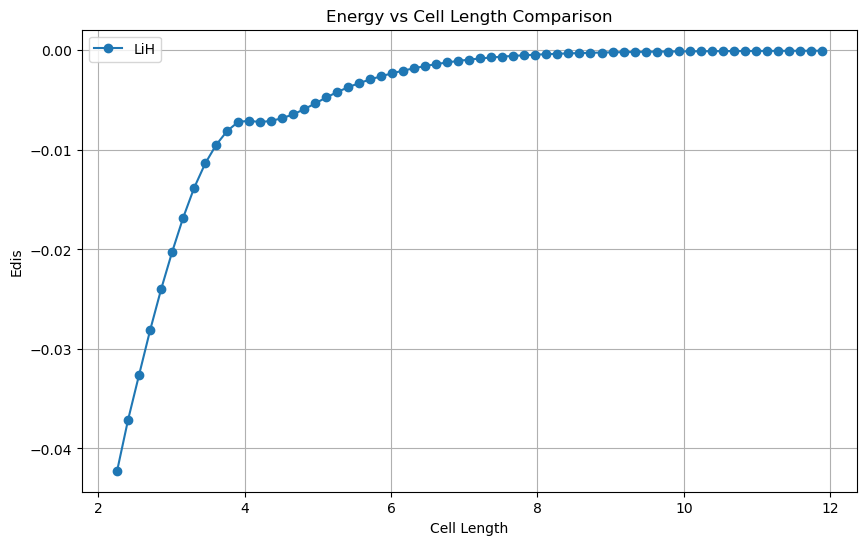

In [18]:
import matplotlib.pyplot as plt

# Read both CSV files
df_lih = pd.read_csv('files/CuI_long.csv')
df_lih_long = pd.read_csv('files/LiH_long.csv')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_lih['cell_length'], df_lih['Edis'], label='LiH', marker='o')
# plt.plot(df_lih_long['cell_length'], df_lih_long['Edis'], label='LiH_long', marker='o')

plt.xlabel('Cell Length')
plt.ylabel('Edis')
plt.title('Energy vs Cell Length Comparison')
plt.legend()
plt.grid(True)
plt.show()

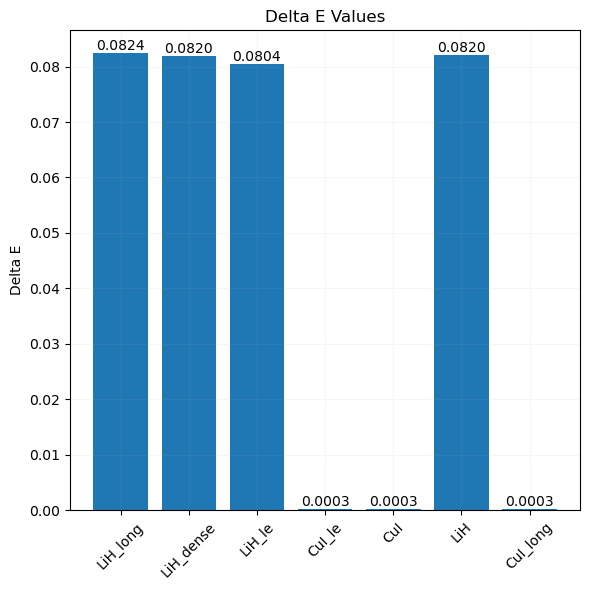

In [19]:
# Extract labels and values from delta_e list
labels = [list(d.keys())[0] for d in delta_e]
values = [list(d.values())[0] for d in delta_e]

# Create bar plot
plt.figure(figsize=(6, 6))
plt.bar(labels, values)
plt.title('Delta E Values')
plt.ylabel('Delta E')
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.grid(True, alpha=0.1)
plt.tight_layout()
plt.show()

# Save to CSV
df_delta_e = pd.DataFrame({'System': labels, 'Delta_E': values})
df_delta_e.to_csv('delta_e_values.csv', index=False)